In [134]:
import numpy as np
import pandas as pd

In [135]:
import tensorflow
from tensorflow import keras

from keras.layers import Dense,Dropout,Flatten,MaxPooling2D,Conv2D,BatchNormalization

from keras.models import Sequential

from keras.applications.vgg16 import VGG16

from keras.regularizers import L2

In [138]:
import os
import shutil

# Define paths
kaggle_dir = os.path.expanduser('~/.kaggle')
kaggle_json_src = 'kaggle.json'
kaggle_json_dest = os.path.join(kaggle_dir, 'kaggle.json')

# Create the .kaggle directory if it doesn't exist
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

# Move the kaggle.json file to the .kaggle directory
shutil.move(kaggle_json_src, kaggle_json_dest)

# Set permissions for kaggle.json file
os.chmod(kaggle_json_dest, 0o600)

In [139]:
# Specify the directory path
directory_path = os.path.expanduser('~/.kaggle')

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)


In [140]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [141]:
import zipfile
def unzip_file(zip_file_path, extract_to_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)
        zip_ref.close()

In [142]:
zip_file_path = '/content/dogs-vs-cats.zip'
extract_to_path = '/content'

unzip_file(zip_file_path, extract_to_path)

In [143]:
# generator
train_ds=keras.utils.image_dataset_from_directory(directory='/content/train',
                                         label_mode='int',
                                         batch_size=32,
                                         labels='inferred',
                                         image_size=(224,224))
test_ds=keras.utils.image_dataset_from_directory(directory='/content/test',
                                                 label_mode='int',
                                                 batch_size=32,
                                                 labels='inferred',
                                                 image_size=(224,224))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [144]:
# normalizing
def process(image,label):
  image=tensorflow.cast(image/255.,tensorflow.float32)
  return image,label

train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [145]:
model=Sequential()

In [146]:
# conv layers of vgg16

conv_layers=VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224,224,3))

In [147]:
conv_layers.trainable=False

In [148]:
conv_layers.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [149]:
model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [118]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_11 (Dense)            (None, 256)               6422784   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 21137729 (80.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [154]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(lr=1e-5),metrics=['accuracy'])
history=model.fit(train_ds,epochs=7,validation_data=test_ds)

Epoch 1/7
625/625 [==============================] - 106s 168ms/step - loss: 0.0288 - accuracy: 0.9895 - val_loss: 0.3311 - val_accuracy: 0.9310
Epoch 2/7
625/625 [==============================] - 124s 198ms/step - loss: 0.0263 - accuracy: 0.9905 - val_loss: 0.3126 - val_accuracy: 0.9338
Epoch 3/7
625/625 [==============================] - 125s 199ms/step - loss: 0.0192 - accuracy: 0.9933 - val_loss: 0.3753 - val_accuracy: 0.9260
Epoch 4/7
625/625 [==============================] - 105s 166ms/step - loss: 0.0181 - accuracy: 0.9937 - val_loss: 0.5227 - val_accuracy: 0.9210
Epoch 5/7
625/625 [==============================] - 104s 166ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.3851 - val_accuracy: 0.9336
Epoch 6/7
625/625 [==============================] - 104s 166ms/step - loss: 0.0156 - accuracy: 0.9948 - val_loss: 0.7023 - val_accuracy: 0.9078
Epoch 7/7
625/625 [==============================] - 124s 198ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.4106 - val_ac

In [157]:
import matplotlib.pyplot as plt

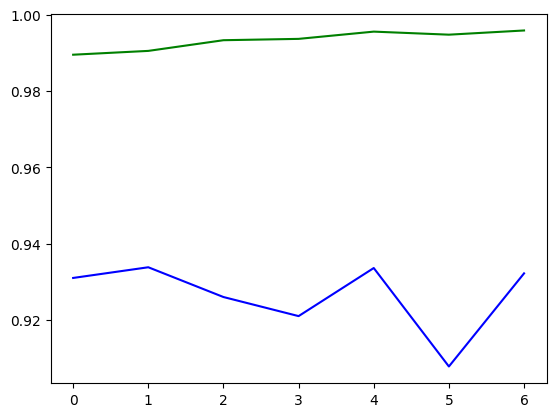

In [156]:
plt.plot(history.history['accuracy'],color='green')
plt.plot(history.history['val_accuracy'],color='blue')
plt.show()

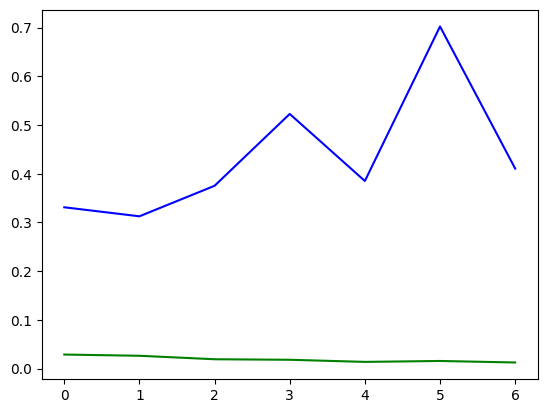

In [158]:
plt.plot(history.history['loss'],color='green')
plt.plot(history.history['val_loss'],color='blue')
plt.show()